<a href="https://colab.research.google.com/github/iamgrootsh7/Coursera_Capstone/blob/main/CapstoneCourseraProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Analysing Neighborhoods of Chennai to open a new Restaurant

<h2><b>Introduction

Chennai is one of the metropolitan cities of India and is one of the most densely populated cities in the world. It lies on the east coast of India and attracts heavy tourism from all over the globe every year. Personally, I have been brought up in Chennai and have loved the city from the bottom of my heart. It is one of the major hubs of the world and is extremely diverse with people from various ethnicities residing here. It has a rich diversity of food and people are crazy about having authentic foods during festivals and celebrations. 
The multi-cultural nature of the city of Chennai has brought along with it numerous cuisines from all over the world. The people of India generally love food and I personally love to try different cuisines and experience different flavors. Thus, the aim of this project is to study the neighborhoods in Chennai to determine possible locations for starting a restaurant. This project can be useful for business owners and entrepreneurs who are looking to invest in a restaurant in Chennai. The main objective of this project is to carefully analyze appropriate data and find recommendations for the stakeholders


<h2><b>Data Collection

The data required for this project has been collected from multiple sources. A summary of the data required for this project is given below.
* Neighborhood data of Chennai 
* Geographical coordinates of Chennai and all neighborhoods in Chennai 
* Venue data for neighborhoods in Chennai


<h3><b>Neighborhoods Data<br></b></h3>
The data of the neighborhoods in Chennai was scraped from <a href="https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai" title="">this dataset</a>. The data is read into a pandas data frame using the read_html() method. The main reason for doing so is that the Wikipedia page provides a comprehensive and detailed table of the data which can easily be scraped using the read_html() method of pandas. 




<h3><b>Geographical Coordinates<br></b></h3>
The geographical coordinates for Chennai data has been obtained from the GeoPy library in python. This data is relevant for plotting the map of Chennai using the Folium library in python. The geocoder library in python has been used to obtain latitude and longitude data for various neighborhoods in Chennai. The coordinates of all neighborhoods in Chennai are used to check the accuracy of coordinates given on Wikipedia and replace them in our data frame if the absolute difference is more than 0.001. These coordinates are then further used for plotting using the Folium library in python. 

<h3><b>Venue Data<br></b></h3>
The venue data has been extracted using the Foursquare API. This data contains venue recommendations for all neighborhoods in Chennai and is used to study the popular venues of different neighborhood.

<h2><b>Importing Libraries

In [ ]:

!pip install geopy
!pip install geocoder
!pip install folium

import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score

%matplotlib notebook

print('All libraries imported.')

All libraries imported.


<h3><b>Data Retrieval</h3></b>
Scraping data from <a href='https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Chennai'> the dataset</a> and reading it into a dataframe.

In [ ]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai')[-2]
df.rename(columns={'Area': 'Neighborhood'}, inplace=True)
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Adambakkam,South and East Chennai,12.9880,80.2047
1,Adyar,South and East Chennai,13.0012,80.2565
2,Alandur,South and East Chennai,12.9975,80.2006
3,Alapakkam,West Chennai,13.0490,80.1673
4,Alwarthirunagar,West Chennai,13.0426,80.1840
5,Ambattur,West Chennai,13.1143,80.1548
6,Aminjikarai,West Chennai,13.0698,80.2245
7,Anna Nagar,West Chennai,13.0850,80.2101
8,Annanur,West Chennai,13.1184,80.1246
9,Arumbakkam,West Chennai,13.0724,80.2102


<b>Shape of the dataset

In [ ]:
df.shape

(176, 4)

<h3><b>Data Wrangling</h3></b>
Lets look at the different values for Location present in the Location column.

In [ ]:
df['Location'].value_counts()

North Chennai                           57
South and East Chennai                  48
West Chennai                            45
Northern Suburbs of Chennai              7
Western Suburbs of Chennai               6
Suburbs along ECR and OMR of Chennai     6
Southern-Eastern Suburbs of Chennai      5
Suburban Chennai                         2
Name: Location, dtype: int64

**Lets clean the Location column to make it easier to understand.**

In [ ]:
df['Location'] = df['Location'].apply(lambda x: x.split(',')[-1])
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Adambakkam,South and East Chennai,12.9880,80.2047
1,Adyar,South and East Chennai,13.0012,80.2565
2,Alandur,South and East Chennai,12.9975,80.2006
3,Alapakkam,West Chennai,13.0490,80.1673
4,Alwarthirunagar,West Chennai,13.0426,80.1840
5,Ambattur,West Chennai,13.1143,80.1548
6,Aminjikarai,West Chennai,13.0698,80.2245
7,Anna Nagar,West Chennai,13.0850,80.2101
8,Annanur,West Chennai,13.1184,80.1246
9,Arumbakkam,West Chennai,13.0724,80.2102


In [ ]:
df.shape

(176, 4)

**Now lets again look at the values in Location column.**

In [ ]:
df['Location'].value_counts()

North Chennai                           57
South and East Chennai                  48
West Chennai                            45
Northern Suburbs of Chennai              7
Western Suburbs of Chennai               6
Suburbs along ECR and OMR of Chennai     6
Southern-Eastern Suburbs of Chennai      5
Suburban Chennai                         2
Name: Location, dtype: int64

**Now that the data is much easier to interpret, lets display the dataframe created.**

In [ ]:
df

,Neighborhood,Location,Latitude,Longitude
0,Adambakkam,South and East Chennai,12.98800,80.20470
1,Adyar,South and East Chennai,13.00120,80.25650
2,Alandur,South and East Chennai,12.99750,80.20060
3,Alapakkam,West Chennai,13.04900,80.16730
4,Alwarthirunagar,West Chennai,13.04260,80.18400
5,Ambattur,West Chennai,13.11430,80.15480
6,Aminjikarai,West Chennai,13.06980,80.22450
7,Anna Nagar,West Chennai,13.08500,80.21010
8,Annanur,West Chennai,13.11840,80.12460
9,Arumbakkam,West Chennai,13.07240,80.21020


**Although the data we gathered contained latitude and longitude information, we can reconfirm these coordinates using Geocoder.**

In [ ]:
df['Latitude1'] = None
df['Longitude1'] = None

for i, neigh in enumerate(df['Neighborhood']):
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Chennai, India'.format(neigh))
        lat_lng_coords = g.latlng
    
    if lat_lng_coords:
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
    
    df.loc[i, 'Latitude1'] = latitude
    df.loc[i, 'Longitude1'] = longitude

df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1
0,Adambakkam,South and East Chennai,12.9880,80.2047,12.9919,80.206
1,Adyar,South and East Chennai,13.0012,80.2565,13.003,80.2519
2,Alandur,South and East Chennai,12.9975,80.2006,13.0001,80.2005
3,Alapakkam,West Chennai,13.0490,80.1673,13.0461,80.165
4,Alwarthirunagar,West Chennai,13.0426,80.1840,13.0506,80.184
5,Ambattur,West Chennai,13.1143,80.1548,13.1188,80.1544
6,Aminjikarai,West Chennai,13.0698,80.2245,13.0714,80.2226
7,Anna Nagar,West Chennai,13.0850,80.2101,13.0836,80.2102
8,Annanur,West Chennai,13.1184,80.1246,13.1121,80.129
9,Arumbakkam,West Chennai,13.0724,80.2102,13.0731,80.2095


In [ ]:
df.shape

(176, 6)

**We can create new columns to see the difference between coordinate values obtained from wikipedia and those obtained from geocoder. We will take the absolute difference between these values and store them in our dataframe.**

In [ ]:
df['Latdiff'] = abs(df['Latitude'] - df['Latitude1'])
df['Longdiff'] = abs(df['Longitude'] - df['Longitude1'])
df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Adambakkam,South and East Chennai,12.9880,80.2047,12.9919,80.206,0.00392,0.00133
1,Adyar,South and East Chennai,13.0012,80.2565,13.003,80.2519,0.00184,0.00463
2,Alandur,South and East Chennai,12.9975,80.2006,13.0001,80.2005,0.00263,0.00011
3,Alapakkam,West Chennai,13.0490,80.1673,13.0461,80.165,0.00287,0.00229
4,Alwarthirunagar,West Chennai,13.0426,80.1840,13.0506,80.184,0.00795,3e-05
5,Ambattur,West Chennai,13.1143,80.1548,13.1188,80.1544,0.00452,0.00038
6,Aminjikarai,West Chennai,13.0698,80.2245,13.0714,80.2226,0.00159,0.00194
7,Anna Nagar,West Chennai,13.0850,80.2101,13.0836,80.2102,0.00141,5e-05
8,Annanur,West Chennai,13.1184,80.1246,13.1121,80.129,0.00628,0.00435
9,Arumbakkam,West Chennai,13.0724,80.2102,13.0731,80.2095,0.00068,0.00068


**We can see that the latitude and longitudes from wikipedia and geocoder are very similar, yet there are some differences. We will replace the values with the coordinates obtained from geocoder if the absolute difference is more than 0.001.**

In [ ]:
df.loc[df.Latdiff>0.001, 'Latitude'] = df.loc[df.Latdiff>0.001, 'Latitude1']
df.loc[df.Longdiff>0.001, 'Longitude'] = df.loc[df.Longdiff>0.001, 'Longitude1']
df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Adambakkam,South and East Chennai,12.9919,80.206,12.9919,80.206,0.00392,0.00133
1,Adyar,South and East Chennai,13.003,80.2519,13.003,80.2519,0.00184,0.00463
2,Alandur,South and East Chennai,13.0001,80.2006,13.0001,80.2005,0.00263,0.00011
3,Alapakkam,West Chennai,13.0461,80.165,13.0461,80.165,0.00287,0.00229
4,Alwarthirunagar,West Chennai,13.0506,80.184,13.0506,80.184,0.00795,3e-05
5,Ambattur,West Chennai,13.1188,80.1548,13.1188,80.1544,0.00452,0.00038
6,Aminjikarai,West Chennai,13.0714,80.2226,13.0714,80.2226,0.00159,0.00194
7,Anna Nagar,West Chennai,13.0836,80.2101,13.0836,80.2102,0.00141,5e-05
8,Annanur,West Chennai,13.1121,80.129,13.1121,80.129,0.00628,0.00435
9,Arumbakkam,West Chennai,13.0724,80.2102,13.0731,80.2095,0.00068,0.00068


**In order to confirm if values have actually been replaced we can use the where method. Values with NaN means those values have not been replaced.**

In [ ]:
df.where(df['Latitude']==df['Latitude1'])

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Adambakkam,South and East Chennai,12.9919,80.206,12.9919,80.206,0.00392,0.00133
1,Adyar,South and East Chennai,13.003,80.2519,13.003,80.2519,0.00184,0.00463
2,Alandur,South and East Chennai,13.0001,80.2006,13.0001,80.2005,0.00263,0.00011
3,Alapakkam,West Chennai,13.0461,80.165,13.0461,80.165,0.00287,0.00229
4,Alwarthirunagar,West Chennai,13.0506,80.184,13.0506,80.184,0.00795,3e-05
5,Ambattur,West Chennai,13.1188,80.1548,13.1188,80.1544,0.00452,0.00038
6,Aminjikarai,West Chennai,13.0714,80.2226,13.0714,80.2226,0.00159,0.00194
7,Anna Nagar,West Chennai,13.0836,80.2101,13.0836,80.2102,0.00141,5e-05
8,Annanur,West Chennai,13.1121,80.129,13.1121,80.129,0.00628,0.00435
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**We can do the same for the Longitude column.**

In [ ]:
df.where(df['Longitude']==df['Longitude1'])

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Adambakkam,South and East Chennai,12.9919,80.206,12.9919,80.206,0.00392,0.00133
1,Adyar,South and East Chennai,13.003,80.2519,13.003,80.2519,0.00184,0.00463
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alapakkam,West Chennai,13.0461,80.165,13.0461,80.165,0.00287,0.00229
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aminjikarai,West Chennai,13.0714,80.2226,13.0714,80.2226,0.00159,0.00194
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Annanur,West Chennai,13.1121,80.129,13.1121,80.129,0.00628,0.00435
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Now that we have the data, we can drop the columns that are no longer useful.**

In [ ]:
df.drop(['Latitude1', 'Longitude1', 'Latdiff', 'Longdiff'], axis=1, inplace=True)
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Adambakkam,South and East Chennai,12.9919,80.206
1,Adyar,South and East Chennai,13.003,80.2519
2,Alandur,South and East Chennai,13.0001,80.2006
3,Alapakkam,West Chennai,13.0461,80.165
4,Alwarthirunagar,West Chennai,13.0506,80.184
5,Ambattur,West Chennai,13.1188,80.1548
6,Aminjikarai,West Chennai,13.0714,80.2226
7,Anna Nagar,West Chennai,13.0836,80.2101
8,Annanur,West Chennai,13.1121,80.129
9,Arumbakkam,West Chennai,13.0724,80.2102


<h2><b>Data Visualization</h2></b>
To understand our data better, we can see how many neighborhoods are in each location.

In [ ]:
neighborhoods_chennai = df.groupby('Location')['Neighborhood'].nunique()
neighborhoods_chennai

Location
North Chennai                           57
Northern Suburbs of Chennai              7
South and East Chennai                  48
Southern-Eastern Suburbs of Chennai      5
Suburban Chennai                         2
Suburbs along ECR and OMR of Chennai     6
West Chennai                            45
Western Suburbs of Chennai               6
Name: Neighborhood, dtype: int64


We can now plot this data.

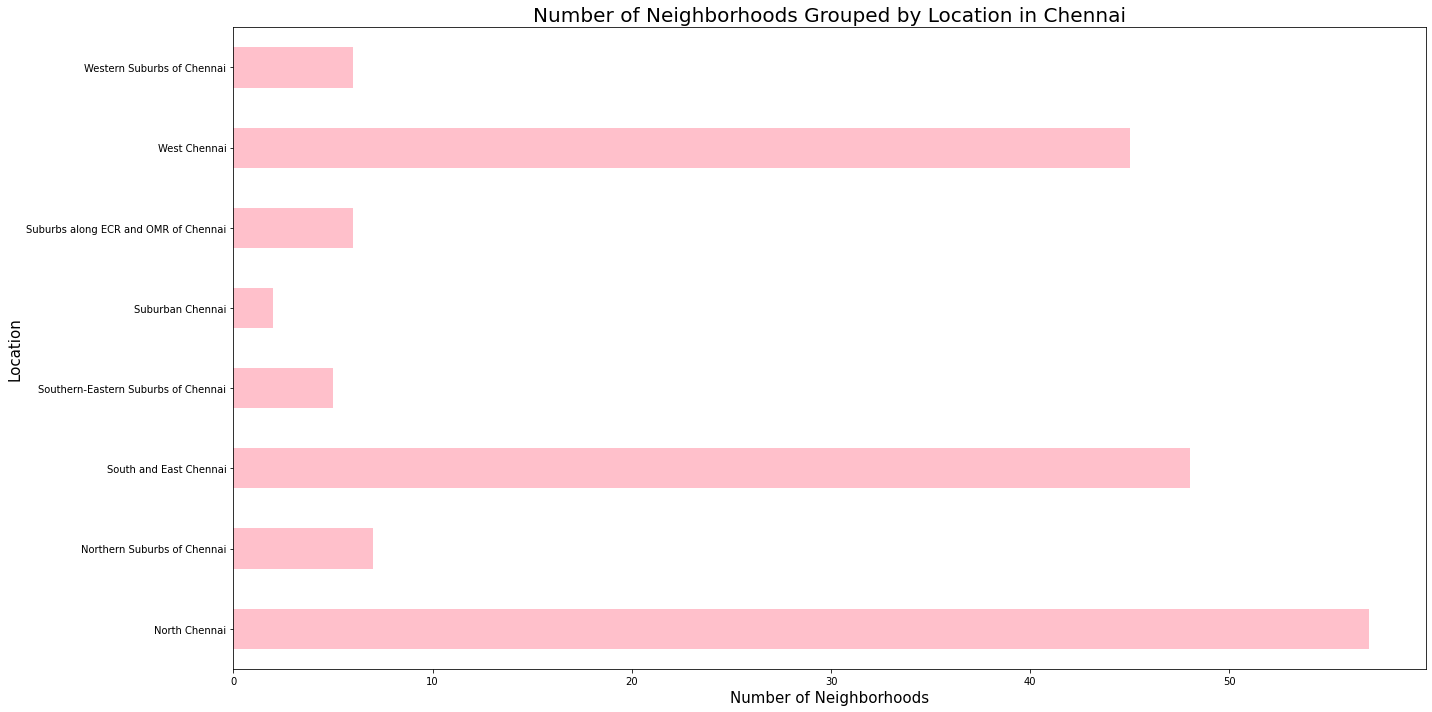

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))

ax = neighborhoods_chennai.plot(kind='barh', color='pink')
ax.set_title('Number of Neighborhoods Grouped by Location in Chennai', fontsize=20)
ax.set_xlabel('Number of Neighborhoods', fontsize=15)
ax.set_ylabel('Location', fontsize=15)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(which='major', left=True)

fig.tight_layout()
fig.show()

**Clearly we can see that South and East Chennai and North Chennaai have the most number of neighborhoods.<br>
Now lets visualize the neighborhoods on a map using Folium. First we will obtain the geographical coordinates of Chennai using GeoPy.**

In [ ]:
address = 'Chennai, IN'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Chennai are {}, {}.'.format(latitude, longitude))

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinates of Chennai are 13.0836939, 80.270186.


**Now we can plot the map.**

In [ ]:
map_mum = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, location, neighborhood in zip(df['Latitude'], df['Longitude'], df['Location'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mum)  
    
map_mum



```
Make this Notebook Trusted to load map: File -> Trust Notebook
```



<h2><b>Using Foursquare API</h2></b>
Now we can start working with the Foursquare API to obtain venue recommendations.

Lets create the Foursquare credentials first.

In [ ]:
CLIENT_ID = 'X5SH1ECGQ0XPLTBR3N1PFNDFTW4A5P3TEJSU1QBSINQQ2DXP' 
CLIENT_SECRET = 'WPO5RYL4QT1TEPKECY5C2UYOPYLJ4YB3HBC3HK23WEGV4JSY'
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: X5SH1ECGQ0XPLTBR3N1PFNDFTW4A5P3TEJSU1QBSINQQ2DXP
CLIENT_SECRET:WPO5RYL4QT1TEPKECY5C2UYOPYLJ4YB3HBC3HK23WEGV4JSY


**Lets start by exploring just the first neighborhood in our dataframe using Foursquare API.**

In [ ]:
neighborhood_name = df.loc[0, 'Neighborhood']
neighborhood_lat = df.loc[0, 'Latitude']
neighborhood_long = df.loc[0, 'Longitude']

print("The neighborhood is {} and it's geographical coordinates are {} latitude and {} longitude".format(neighborhood_name,
                                                                                                        neighborhood_lat, neighborhood_long))

The neighborhood is Adambakkam and it's geographical coordinates are 12.99192000000005 latitude and 80.20603000000006 longitude


**The neighborhood is Amboli and it's geographical coordinates are 19.1293 latitude and 72.84644000000003 longitude<br>
We will now extract the top 200 venues near Amboli with a radius of 1000m or 1km. In order to do this, we will start by creating a url.**

In [ ]:
LIMIT = 200
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_lat, 
    neighborhood_long, 
    radius, 
    LIMIT)

**We can now use the GET method to get our results.**

In [ ]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6096cf23904c91263fd0139c'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-5155ca10e4b0cc3dad2cf381-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1ca941735',
         'name': 'Pizza Place',
         'pluralName': 'Pizza Places',
         'primary': True,
         'shortName': 'Pizza'}],
       'id': '5155ca10e4b0cc3dad2cf381',
       'location': {'address': 'VIHAS Restaurant',
        'cc': 'IN',
        'city': 'Chennai',
        'country': 'India',
        'crossStreet': '195/5 Medavakkam Main Road, Adambakkam',
        'distance': 811,
        'formattedAddress': ['VIHAS Restaurant (195/5 Medavakkam Main Road, Adambakkam)',
         'Chennai 600088',
     

**We will now create a function get_category_type to extract the categories of venues.**

In [ ]:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**Now we can clean the JSON obtained using the GET method and store our results in a dataframe.**

In [ ]:

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,name,categories,lat,lng
0,Pizza Republic,Pizza Place,12.990987,80.198613
1,St Thomas Mount Railway Station,Train Station,12.994987,80.200302
2,Sukkkubai Beef Biryani Shop,Indian Restaurant,12.998769,80.201381
3,Loiee,Bakery,12.992197,80.199000
4,Venkateshwara Super Market,Department Store,12.986320,80.205168


In [ ]:
print("{} venues were returned for {} by Foursquare".format(len(nearby_venues), neighborhood_name))

10 venues were returned for Adambakkam by Foursquare


<b><h2>Generalizing Foursquare API</h2></b>
Now that we have seen how the API call works and how we can clean our data to get relevant information, we can generalize this procedure to get nearby venues for all neighborhoods by creating the function getNearbyVenues.

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


We can apply the function created to get nearby venues for all neighborhoods in Chennai. We will get 200 nearby venues within a 1km radius, same as before.

In [ ]:
mum_venues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'], radius=radius)

Adambakkam
Adyar
Alandur
Alapakkam
Alwarthirunagar
Ambattur
Aminjikarai
Anna Nagar
Annanur
Arumbakkam
Ashok Nagar
Avadi
Ayappakkam
Basin Bridge
Besant Nagar
Broadway
Central
Chetpet
Choolai
MMDA Colony
Defence Colony
Egmore
Ennore
Erukanchery
George Town
Gerugambakkam
Gopalapuram
Guindy
Hastinapuram
ICF Colony
Injambakkam
Irumbuliyur
Iyyapanthangal
Jamalia
K.K. Nagar
Kadaperi
Kallikuppam
Karambakkam
Kathirvedu
Kathivakkam
Keelkattalai
Kodungaiyur
Kolappakkam
Kolathur
Korattur
Korukkupet
Kosapet
Kottivakkam
Kovilambakkam
Koyambedu
Kundrathur
Lakshmipuram
M.G.R. Garden
M.G.R. Nagar
M.K.B. Nagar
Madhavaram
Madhavaram Milk Colony
Madipakkam
Maduravoyal
Mambakkam
Manali
Manali New Town
manapakkam
Mangadu
Manjambakkam
Mannadi
Mathur MMDA
Medavakkam
Minjur
Mogappair
Moolakadai
Mowlivakkam
Mudichur
Mugalivakkam
Mylapore
Nagalkeni
Nandambakkam
Nanganallur
Naravarikuppam
Neelankarai
Nerkundrum
Nesapakkam
New Washermenpet
Nolambur
Old Washermenpet
Oragadam
Otteri
Padi
Palavakkam
Pallavaram
Pallik

**Lets see what our dataframe looks like.**

In [ ]:
print(mum_venues.shape)
mum_venues.head(10)

(1959, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adambakkam,12.99192,80.20603,Pizza Republic,12.990987,80.198613,Pizza Place
1,Adambakkam,12.99192,80.20603,St Thomas Mount Railway Station,12.994987,80.200302,Train Station
2,Adambakkam,12.99192,80.20603,Sukkkubai Beef Biryani Shop,12.998769,80.201381,Indian Restaurant
3,Adambakkam,12.99192,80.20603,Loiee,12.992197,80.199000,Bakery
4,Adambakkam,12.99192,80.20603,Venkateshwara Super Market,12.986320,80.205168,Department Store
5,Adambakkam,12.99192,80.20603,Deepam Restaurant,12.985380,80.205281,Indian Restaurant
6,Adambakkam,12.99192,80.20603,St. Thomas mount railway station,12.998494,80.203740,Train Station
7,Adambakkam,12.99192,80.20603,Design Hotel Chennai by jüSTa,12.992068,80.214965,Hotel
8,Adambakkam,12.99192,80.20603,St. Thomas Mount Metro Station,12.994772,80.197556,Metro Station
9,Adambakkam,12.99192,80.20603,Heritage Fresh,13.000499,80.208087,Supermarket


**Lets see how many venues were returned for each neighborhood.**

In [ ]:
mum_venues.groupby('Neighborhood', as_index=False).count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adambakkam,10,10,10,10,10,10
1,Adyar,68,68,68,68,68,68
2,Alandur,17,17,17,17,17,17
3,Alapakkam,10,10,10,10,10,10
4,Alwarthirunagar,15,15,15,15,15,15
5,Ambattur,10,10,10,10,10,10
6,Aminjikarai,17,17,17,17,17,17
7,Anna Nagar,69,69,69,69,69,69
8,Annanur,6,6,6,6,6,6
9,Arumbakkam,15,15,15,15,15,15


**We can now check how many unique categories are there in our data.**

In [ ]:

print("There are {} unique categories".format(mum_venues['Venue Category'].nunique()))

There are 191 unique categories


<h2><b>Analyzing each neighborhood</b></h2>
We can start analyzing each neighborhood by One-hot Encoding to see which categories belong in which neighborhoods.

In [ ]:
mum_onehot = pd.get_dummies(mum_venues[['Venue Category']], prefix="", prefix_sep="")
mum_onehot.head()

,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,Antique Shop,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Bengali Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Buffet,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Campground,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Cricket Ground,Currency Exchange,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Herbs & Spices Store,Historic Site,Hookah Bar,Hospital,Hotel,Hotel Bar,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Kerala Restaurant,Kids Store,Korean Restaurant,Light Rail Station,Lounge,Market,Martial Arts School,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multicuisine Indian Restaurant,Multiplex,Museum,Music School,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,North Indian Restaurant,Office,Optical Shop,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Rajasthani Restaurant,Recreation Center,Resort,Restaurant,River,Rock Club,Russian Restaurant,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,Soup Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Club,Stationery Store,Steakhouse,Supermarket,Surf Spot,Tea Room,Thai Restaurant,Theater,Theme Park,Toll Plaza,Toy / Game Store,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Whisky Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

**Adding Neighborhood column to the one-hot encoded dataframe.**

In [ ]:
mum_onehot['Neighborhood'] = mum_venues['Neighborhood']
mum_onehot.head()

,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,Antique Shop,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Bengali Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Buffet,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Campground,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Cricket Ground,Currency Exchange,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Herbs & Spices Store,Historic Site,Hookah Bar,Hospital,Hotel,Hotel Bar,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Kerala Restaurant,Kids Store,Korean Restaurant,Light Rail Station,Lounge,Market,Martial Arts School,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multicuisine Indian Restaurant,Multiplex,Museum,Music School,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,North Indian Restaurant,Office,Optical Shop,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Rajasthani Restaurant,Recreation Center,Resort,Restaurant,River,Rock Club,Russian Restaurant,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,Soup Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Club,Stationery Store,Steakhouse,Supermarket,Surf Spot,Tea Room,Thai Restaurant,Theater,Theme Park,Toll Plaza,Toy / Game Store,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Whisky Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adambakkam,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adambakkam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adambakkam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

**Moving the Neighborhood column to the first column.**

In [ ]:
temp = list(mum_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
mum_onehot = mum_onehot[fixed_columns]

mum_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,Antique Shop,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Bengali Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Buffet,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Campground,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Cricket Ground,Currency Exchange,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Herbs & Spices Store,Historic Site,Hookah Bar,Hospital,Hotel,Hotel Bar,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Kerala Restaurant,Kids Store,Korean Restaurant,Light Rail Station,Lounge,Market,Martial Arts School,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multicuisine Indian Restaurant,Multiplex,Museum,Music School,Music Store,Music Venue,New American Restaurant,Nightclub,North Indian Restaurant,Office,Optical Shop,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Rajasthani Restaurant,Recreation Center,Resort,Restaurant,River,Rock Club,Russian Restaurant,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,Soup Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Club,Stationery Store,Steakhouse,Supermarket,Surf Spot,Tea Room,Thai Restaurant,Theater,Theme Park,Toll Plaza,Toy / Game Store,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Whisky Bar,Women's Store
0,Adambakkam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Adambakkam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Adambakkam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Adambakkam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

**Now we can groupby neighborhood and take the mean for all categories.**

In [ ]:

mum_grouped = mum_onehot.groupby('Neighborhood', sort=False).mean().reset_index()
print(mum_grouped.shape)
mum_grouped.head(10)

(161, 191)


,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,Antique Shop,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Bengali Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Buffet,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Campground,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Cricket Ground,Currency Exchange,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Herbs & Spices Store,Historic Site,Hookah Bar,Hospital,Hotel,Hotel Bar,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Kerala Restaurant,Kids Store,Korean Restaurant,Light Rail Station,Lounge,Market,Martial Arts School,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multicuisine Indian Restaurant,Multiplex,Museum,Music School,Music Store,Music Venue,New American Restaurant,Nightclub,North Indian Restaurant,Office,Optical Shop,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Rajasthani Restaurant,Recreation Center,Resort,Restaurant,River,Rock Club,Russian Restaurant,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,Soup Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Club,Stationery Store,Steakhouse,Supermarket,Surf Spot,Tea Room,Thai Restaurant,Theater,Theme Park,Toll Plaza,Toy / Game Store,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Whisky Bar,Women's Store
0,Adambakkam,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.100000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.100000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.000000,0.0,0.0,0.000000,0.200000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.100000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.000000,0.0,0.0,0.0,0.000000
1,Adyar,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.014706,0.0,0.044118,0.0,0.014706,0.000000,0.014706,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.014706,0.0,0.0,0.0,0.014706,0.0,0.00000

**In order to further understand the data, we can display the top 5 venues of all neighborhoods.**

In [ ]:
num_top_venues = 5

for hood in mum_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mum_grouped[mum_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adambakkam----
               venue  freq
0  Indian Restaurant   0.2
1      Train Station   0.2
2        Pizza Place   0.1
3              Hotel   0.1
4   Department Store   0.1


----Adyar----
                  venue  freq
0     Indian Restaurant  0.22
1           Pizza Place  0.06
2                  Café  0.06
3  Fast Food Restaurant  0.04
4      Asian Restaurant  0.04


----Alandur----
               venue  freq
0  Indian Restaurant  0.18
1             Bakery  0.12
2      Metro Station  0.12
3      Train Station  0.12
4              Hotel  0.12


----Alapakkam----
                  venue  freq
0      Department Store   0.2
1  Fast Food Restaurant   0.2
2     Accessories Store   0.1
3      Business Service   0.1
4      Asian Restaurant   0.1


----Alwarthirunagar----
                  venue  freq
0        Clothing Store  0.13
1  Fast Food Restaurant  0.13
2           Pizza Place  0.13
3            Smoke Shop  0.07
4             Multiplex  0.07


----Ambattur----
              venu

**Lets now create a dataframe with the top 10 common venues for each neighborhood.**

In [ ]:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mum_grouped['Neighborhood']

for ind in np.arange(mum_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mum_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,Indian Restaurant,Train Station,Supermarket,Department Store,Hotel,Pizza Place,Metro Station,Bakery,Food Truck,Food Service
1,Adyar,Indian Restaurant,Café,Pizza Place,Asian Restaurant,Department Store,Chinese Restaurant,Fast Food Restaurant,Ice Cream Shop,Rock Club,North Indian Restaurant
2,Alandur,Indian Restaurant,Metro Station,Bakery,Train Station,Hotel,Church,Café,Fish Market,Breakfast Spot,Pizza Place
3,Alapakkam,Department Store,Fast Food Restaurant,Bakery,Accessories Store,Sandwich Place,Clothing Store,Business Service,Asian Restaurant,Fried Chicken Joint,Food Truck
4,Alwarthirunagar,Pizza Place,Clothing Store,Fast Food Restaurant,Ice Cream Shop,Tea Room,Chinese Restaurant,Café,Multiplex,Movie Theater,Gym
5,Ambattur,Ice Cream Shop,Movie Theater,Indian Restaurant,Flea Market,Multiplex,River,Asian Restaurant,Department Store,Electronics Store,Event Space
6,Aminjikarai,Fast Food Restaurant,Pizza Place,Electronics Store,Clothing Store,Shopping Mall,Burger Joint,Cosmetics Shop,Bookstore,Furniture / Home Store,Event Space
7,Anna Nagar,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Department Store,Vegetarian / Vegan Restaurant,Coffee Shop,Clothing Store,Gym,Bakery,Electronics Store
8,Annanur,Train Station,Platform,Medical Supply Store,Stationery Store,Women's Store,Fast Food Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop
9,Arumbakkam,Hotel,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Food Court,Scenic Lookout,South Indian Restaurant,Burger Joint,Event Space,Bus Station,Chinese Restaurant


<b><h2>Clustering neighborhoods</b></h2>
Now we can use KMeans clustering method to cluster the neighborhoods.

First we need to determine how many clusters to use. This will be done using the Silhouette Score.

We will define a function to plot the Silhouette Score that will be calculated using different number of clusters.

In [ ]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [ ]:

maxk = 15
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = mum_grouped.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

**We can now display the scores for different number of clusters and plot the data as well.**

[0.0718085205575224, 0.07972028701466906, 0.11036051981759645, 0.0784490478657264, 0.09422430866459211, 0.095910320568309, 0.08922155074589556, 0.11332498702035385, 0.11681979767507217, 0.1315760456349403, 0.11754773397789754, 0.11122812965900154, 0.11734136351107054, 0.08973963130670679]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


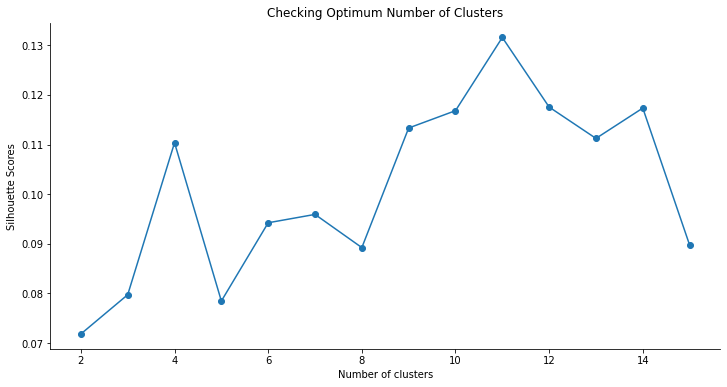

In [ ]:
%matplotlib inline
print(scores)
print(kval)
plot(kval, scores)


We can see that the silhouette scores are not very high even as we increase the number of clusters. This means that the inter-cluster distance between different clusters is not very high over the range of k-values. However, we will try to cluster our data as best as we can. For this, we will use 5 clusters for our clustering model since it provides the highest silhouette score as seen above.

In [ ]:
k = 11

mum_clustering = mum_grouped.drop('Neighborhood', axis=1)
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit(mum_clustering) #Can choose any random_state

kmeans.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  4,  4, 10,  0,  3,  0,
        3,  0,  7,  0,  0,  2,  0,  0,  8,  0,  0,  0,  0,  0,  4,  8,  0,
        0,  3,  3,  6,  4,  5,  8,  3,  0,  3,  0,  0,  4,  4,  0,  0,  4,
        9,  4,  0,  0,  8,  7,  3,  1,  3,  0,  1,  3,  4,  4,  0,  8,  5,
        0,  0,  0,  0,  5,  4,  0,  0,  0,  4,  0,  4,  5,  4,  0,  0,  4,
        3,  4,  0,  3, 10,  0,  0,  0,  4,  5,  0,  9,  0,  0,  4,  0,  5,
        5, 10,  3,  5,  4,  0,  4,  0,  0,  5,  0,  0,  0,  0,  4,  4,  0,
        0,  0,  0,  4,  4,  2,  0,  3,  0,  0,  4,  5,  0,  0,  0, 10,  0,
        3,  0, 10,  4,  8,  4,  0,  3,  3,  0,  2,  0,  3,  8,  0,  0,  8,
        0,  3,  3,  0,  3,  0,  0,  5], dtype=int32)


**Now we can create a new dataframe that includes cluster labels and the top 10 venues.**

In [ ]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
mum_merged = df
mum_merged = mum_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [ ]:

print(mum_merged.shape)
mum_merged

(176, 15)


,Neighborhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,South and East Chennai,12.9919,80.206,0.0,Indian Restaurant,Train Station,Supermarket,Department Store,Hotel,Pizza Place,Metro Station,Bakery,Food Truck,Food Service
1,Adyar,South and East Chennai,13.003,80.2519,0.0,Indian Restaurant,Café,Pizza Place,Asian Restaurant,Department Store,Chinese Restaurant,Fast Food Restaurant,Ice Cream Shop,Rock Club,North Indian Restaurant
2,Alandur,South and East Chennai,13.0001,80.2006,0.0,Indian Restaurant,Metro Station,Bakery,Train Station,Hotel,Church,Café,Fish Market,Breakfast Spot,Pizza Place
3,Alapakkam,West Chennai,13.0461,80.165,0.0,Department Store,Fast Food Restaurant,Bakery,Accessories Store,Sandwich Place,Clothing Store,Business Service,Asian Restaurant,Fried Chicken Joint,Food Truck
4,Alwarthirunagar,West Chennai,13.0506,80.184,0.0,Pizza Place,Clothing Store,Fast Food Restaurant,Ice Cream Shop,Tea Room,Chinese Restaurant,Café,Multiplex,Movie Theater,Gym
5,Ambattur,West Chennai,13.1188,80.1548,0.0,Ice Cream Shop,Movie Theater,Indian Restaurant,Flea Market,Multiplex,River,Asian Restaurant,Department Store,Electronics Store,Event Space
6,Aminjikarai,West Chennai,13.0714,80.2226,0.0,Fast Food Restaurant,Pizza Place,Electronics Store,Clothing Store,Shopping Mall,Burger Joint,Cosmetics Shop,Bookstore,Furniture / Home Store,Event Space
7,Anna Nagar,West Chennai,13.0836,80.2101,0.0,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Department Store,Vegetarian / Vegan Restaurant,Coffee Shop,Clothing Store,Gym,Bakery,Electronics Store
8,Annanur,West Chennai,13.1121,80.129,10.0,Train Station,Platform,Medical Supply Store,Stationery Store,Women's Store,Fast Food Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop
9,Arumbakkam,West Chennai,13.0724,80.2102,0.0,Hotel,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Food Court,Scenic Lookout,South Indian Restaurant,Burger Joint,Event Space,Bus Station,Chinese Restaurant


In [ ]:
mum_merged = mum_merged.dropna()
mum_merged = mum_merged.reset_index(drop=True)

print (mum_merged)

               Neighborhood                              Location Latitude  \
0                Adambakkam                South and East Chennai  12.9919   
1                     Adyar                South and East Chennai   13.003   
2                   Alandur                South and East Chennai  13.0001   
3                 Alapakkam                          West Chennai  13.0461   
4           Alwarthirunagar                          West Chennai  13.0506   
5                  Ambattur                          West Chennai  13.1188   
6               Aminjikarai                          West Chennai  13.0714   
7                Anna Nagar                          West Chennai  13.0836   
8                   Annanur                          West Chennai  13.1121   
9                Arumbakkam                          West Chennai  13.0724   
10              Ashok Nagar                          West Chennai  13.0354   
11                    Avadi                          West Chenna

In [ ]:
mum_merged.shape

(167, 15)

**We can visualize the clustering by creating a map.**

In [ ]:
%matplotlib inline
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(k)
#print(x)
ys = [i + x + (i*x)**2 for i in range(k)]
#print(ys)
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#print(colors_array)

markers_colors = []
for lat, lon, poi, cluster in zip(mum_merged['Latitude'], mum_merged['Longitude'], mum_merged['Neighborhood'], mum_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



```
Make this Notebook Trusted to load map: File -> Trust Notebook
```



<h3><b>We can now view the neighborhoods in each cluster and their top 10 most common venues.

<b><h3>
Cluster 1

In [ ]:
mum_merged.loc[mum_merged['Cluster Labels'] == 0, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,South and East Chennai,Indian Restaurant,Train Station,Supermarket,Department Store,Hotel,Pizza Place,Metro Station,Bakery,Food Truck,Food Service
1,Adyar,South and East Chennai,Indian Restaurant,Café,Pizza Place,Asian Restaurant,Department Store,Chinese Restaurant,Fast Food Restaurant,Ice Cream Shop,Rock Club,North Indian Restaurant
2,Alandur,South and East Chennai,Indian Restaurant,Metro Station,Bakery,Train Station,Hotel,Church,Café,Fish Market,Breakfast Spot,Pizza Place
3,Alapakkam,West Chennai,Department Store,Fast Food Restaurant,Bakery,Accessories Store,Sandwich Place,Clothing Store,Business Service,Asian Restaurant,Fried Chicken Joint,Food Truck
4,Alwarthirunagar,West Chennai,Pizza Place,Clothing Store,Fast Food Restaurant,Ice Cream Shop,Tea Room,Chinese Restaurant,Café,Multiplex,Movie Theater,Gym
5,Ambattur,West Chennai,Ice Cream Shop,Movie Theater,Indian Restaurant,Flea Market,Multiplex,River,Asian Restaurant,Department Store,Electronics Store,Event Space
6,Aminjikarai,West Chennai,Fast Food Restaurant,Pizza Place,Electronics Store,Clothing Store,Shopping Mall,Burger Joint,Cosmetics Shop,Bookstore,Furniture / Home Store,Event Space
7,Anna Nagar,West Chennai,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Department Store,Vegetarian / Vegan Restaurant,Coffee Shop,Clothing Store,Gym,Bakery,Electronics Store
9,Arumbakkam,West Chennai,Hotel,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Food Court,Scenic Lookout,South Indian Restaurant,Burger Joint,Event Space,Bus Station,Chinese Restaurant
10,Ashok Nagar,West Chennai,Indian Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,Fast Food Restaurant,Sculpture Garden,Coffee Shop,Multicuisine Indian Restaurant,Café,Restaurant,Snack Place


<b><h3>
Cluster 2

In [ ]:

mum_merged.loc[mum_merged['Cluster Labels'] == 1, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
58,Mangadu,West Chennai,Pharmacy,Furniture / Home Store,Fruit & Vegetable Store,Fried Chicken Joint,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop
61,Mathur MMDA,North Chennai,Pharmacy,Furniture / Home Store,Fruit & Vegetable Store,Fried Chicken Joint,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop


<b><h3>
Cluster 3

In [ ]:

mum_merged.loc[mum_merged['Cluster Labels'] == 2, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Ennore,North Chennai,Train Station,Women's Store,Fast Food Restaurant,Fried Chicken Joint,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop
124,Thirunindravur,West Chennai,Train Station,Pharmacy,Fast Food Restaurant,Fried Chicken Joint,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop
146,Athipattu,Northern Suburbs of Chennai,Train Station,Platform,Women's Store,Fast Food Restaurant,Fried Chicken Joint,Food Truck,Food Service,Food Court,Food & Drink Shop,Food
150,Ennore,Northern Suburbs of Chennai,Train Station,Women's Store,Fast Food Restaurant,Fried Chicken Joint,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop
153,Thirunindravur,Western Suburbs of Chennai,Train Station,Pharmacy,Fast Food Restaurant,Fried Chicken Joint,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop


<b><h3>
Cluster 4

In [ ]:
mum_merged.loc[mum_merged['Cluster Labels'] == 3, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Broadway,North Chennai,Indian Restaurant,Market,Department Store,Restaurant,Snack Place,Video Store,Hotel,Fried Chicken Joint,Food Service,Food Court
17,Chetpet,South and East Chennai,Indian Restaurant,Café,Hotel,Coffee Shop,Chinese Restaurant,Restaurant,Seafood Restaurant,Bakery,Ice Cream Shop,Juice Bar
35,Kadaperi,South and East Chennai,Indian Restaurant,Train Station,Jewelry Store,Restaurant,Light Rail Station,Fish Market,Fried Chicken Joint,Food Truck,Food Service,Food Court
36,Karambakkam,West Chennai,Indian Restaurant,Flea Market,Restaurant,Deli / Bodega,Fish Market,Fried Chicken Joint,Food Truck,Food Service,Food Court,Food & Drink Shop
41,Kolathur,North Chennai,Indian Restaurant,ATM,Restaurant,Bus Stop,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop
43,Kosapet,North Chennai,Indian Restaurant,Department Store,Hotel,Fish Market,Fruit & Vegetable Store,Fried Chicken Joint,Food Truck,Food Service,Food Court,Food & Drink Shop
57,manapakkam,West Chennai,Indian Restaurant,Afghan Restaurant,Trail,Women's Store,Fast Food Restaurant,Fried Chicken Joint,Food Truck,Food Service,Food Court,Food & Drink Shop
59,Manjambakkam,North Chennai,Indian Restaurant,Fish Market,Fruit & Vegetable Store,Fried Chicken Joint,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop
62,Medavakkam,South and East Chennai,Indian Restaurant,Pizza Place,Chinese Restaurant,Women's Store,Fast Food Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,Food
85,Pallikaranai,South and East Chennai,Indian Restaurant,Bar,Gaming Cafe,Fruit & Vegetable Store,Fried Chicken Joint,Food Truck,Food Service,Food Court,Food & Drink Shop,Food


<b><h3>
Cluster 5

In [ ]:
mum_merged.loc[mum_merged['Cluster Labels'] == 4, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Avadi,West Chennai,IT Services,Department Store,Concert Hall,Park,Breakfast Spot,Women's Store,Fish Market,Food Truck,Food Service,Food Court
12,Ayappakkam,West Chennai,Pharmacy,Department Store,Clothing Store,Print Shop,Medical Supply Store,Supermarket,Fish Market,Food Truck,Food Service,Food Court
31,Irumbuliyur,South and East Chennai,Asian Restaurant,Motorcycle Shop,Bus Station,Coffee Shop,Restaurant,Fish Market,Food Truck,Food Service,Food Court,Food & Drink Shop
38,Keelkattalai,South and East Chennai,Fast Food Restaurant,Pizza Place,Fried Chicken Joint,Electronics Store,Bus Station,Fish Market,Food Truck,Food Service,Food Court,Food & Drink Shop
46,Koyambedu,West Chennai,Vegetarian / Vegan Restaurant,Bus Station,South Indian Restaurant,Fast Food Restaurant,Metro Station,Department Store,Flower Shop,Food Court,Antique Shop,Bus Line
47,Kundrathur,West Chennai,Soup Place,Bus Station,Furniture / Home Store,Fruit & Vegetable Store,Fried Chicken Joint,Food Truck,Food Service,Food Court,Food & Drink Shop,Food
50,M.G.R. Nagar,West Chennai,Thai Restaurant,Bed & Breakfast,Bus Station,Grocery Store,Furniture / Home Store,Fried Chicken Joint,Food Truck,Food Service,Food Court,Food & Drink Shop
52,Madhavaram,North Chennai,Ice Cream Shop,Park,Food & Drink Shop,Bus Station,Fish Market,Fried Chicken Joint,Food Truck,Food Service,Food Court,Food
63,Minjur,North Chennai,Pharmacy,Train Station,Scenic Lookout,Park,Fast Food Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,Food
64,Mogappair,West Chennai,Chinese Restaurant,Bakery,Pizza Place,South Indian Restaurant,Bus Station,Food & Drink Shop,Ice Cream Shop,Accessories Store,Donut Shop,Electronics Store


<b><h2>Results and Discussion</h2></b><br>

By analyzing the five clusters obtained we can see that some of the clusters are more suited for restaurants and hotels, whereas, other clusters are less suited. Neighborhoods in clusters 2, 3, and 4 contain a small percentage of restaurants, hotels, cafe and pubs in their top 10 common venues. These clusters contain a higher degree of other venues like train station, bus station, fish market, gym, performing arts venue and smoke shop, to name a few. Thus, they are not well suited for opening a new restaurant. On the other hand, neighborhoods in clusters 1 and 5 contain a much higher degree of restaurants, hotels, multiplex, cafes, bars and other food joints. Thus, the neighborhoods in these clusters would be well suited for opening a new restaurant.

Comparing clusters 1 and 5, neighborhoods in cluster 1 seem to be more suited for starting a restaurant since they contains a larger percentage of food joints in the top 10 most common venues than cluster 5. The neighborhoods in cluster 1 contain a variety of food joints like restaurants, tea rooms, bakery, cafe, food trucks and many eateries, and also contain very diverse cuisines like Japanese, Indian, Chinese, Italian and seafood restaurants. Most neighborhoods in cluster 5 seem to have Indian Restaurant as their top most common venue; however, on careful analysis we can see that neighborhoods in cluster 5 also contain other venues like soccer field, flea market, smoke shop, gym, train station, dance studio, music store, cosmetics shop and so on. Thus, it is recommended that the new restaurant can be opened in the neighborhoods belonging to cluster 1. This neighborhood can be further plotted on a map as shown below.

In [ ]:

new_restaurant_neighborhoods = mum_merged.loc[mum_merged['Cluster Labels'] == 0, mum_merged.columns[[0, 1, 2, 3] + list(range(5, mum_merged.shape[1]))]]
new_restaurant_neighborhoods.head()

,Neighborhood,Location,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,South and East Chennai,12.9919,80.206,Indian Restaurant,Train Station,Supermarket,Department Store,Hotel,Pizza Place,Metro Station,Bakery,Food Truck,Food Service
1,Adyar,South and East Chennai,13.003,80.2519,Indian Restaurant,Café,Pizza Place,Asian Restaurant,Department Store,Chinese Restaurant,Fast Food Restaurant,Ice Cream Shop,Rock Club,North Indian Restaurant
2,Alandur,South and East Chennai,13.0001,80.2006,Indian Restaurant,Metro Station,Bakery,Train Station,Hotel,Church,Café,Fish Market,Breakfast Spot,Pizza Place
3,Alapakkam,West Chennai,13.0461,80.165,Department Store,Fast Food Restaurant,Bakery,Accessories Store,Sandwich Place,Clothing Store,Business Service,Asian Restaurant,Fried Chicken Joint,Food Truck
4,Alwarthirunagar,West Chennai,13.0506,80.184,Pizza Place,Clothing Store,Fast Food Restaurant,Ice Cream Shop,Tea Room,Chinese Restaurant,Café,Multiplex,Movie Theater,Gym


**Plotting neighborhoods of Cluster 1**

In [ ]:
%matplotlib inline
map_res_locations = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, location, neighborhood in zip(new_restaurant_neighborhoods['Latitude'], new_restaurant_neighborhoods['Longitude'],
                                            new_restaurant_neighborhoods['Location'], new_restaurant_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, location)
    folium.Marker([lat, lng], popup='{} has geographical coordinates ({:.4f}, {:.4f})'.format(label, lat, lng),
                  icon=folium.Icon(color='lightred'), tooltip=label).add_to(map_res_locations)
    
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_res_locations) 

map_res_locations



```
Make this Notebook Trusted to load map: File -> Trust Notebook
```




<h1><b>Conclusion</h1></b>

We have successfully analyzed the neighborhoods in Chennai, India for determining which would be the best neighborhoods for opening a new restaurant. Based on our analysis, neighborhoods in cluster 1 are recommended as locations for the new restaurant. This has also been plotted in the map above. The stakeholders and investors can further tune this by considering various other factors like transport, legal requirements, and costs associated. These were out of the scope for this project and thus were not considered.

<b><h1>Thank You!! Have a good day!!